In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from tqdm import tqdm

In [2]:
# Storing processed data for subsequent modeling
inputs = []
labels = []

In [3]:
# all genres
genres = os.listdir('genres')
del genres[1]
genres

['pop',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 'country',
 'jazz']

In [4]:
label_dict = dict(zip(genres, list(np.arange(10))))
label_dict

{'pop': 0,
 'metal': 1,
 'disco': 2,
 'blues': 3,
 'reggae': 4,
 'classical': 5,
 'rock': 6,
 'hiphop': 7,
 'country': 8,
 'jazz': 9}

In [5]:
n_mfcc = 20 # number of mfcc (Mel Frequency Cepstral Coefficients) to compute for each frame
#more mfcc leads to more detailed representations of the spectral content of the audio
n_fft=2048 # window size for each fft (fast fourier transform)
hop_length = 512 # the stride to slide the window above; shorter hop length leads to better time resolution
sample_rate = 222050 # number of smaples per second
duration = 30 # duration of each audio file
sample_per_track = sample_rate * duration # total number of samples per audio file
num_seg = 5 # divide an audio file into a certain number of segments; expand the data size
sample_per_seg = int(sample_per_track / num_seg)
mfcc_per_seg = math.ceil(sample_per_seg / hop_length)

In [6]:
# preporcessing the dataset
for c in genres:
    class_folder = os.path.join('genres', c)
    label = label_dict[c]
    print(label)
    for file in tqdm(os.listdir(class_folder)):
        path = os.path.join(class_folder, file)
        signal, sr = librosa.load(path, sr=sample_rate)
        for i in range(num_seg):
            idx1 = sample_per_seg * i
            idx2 = idx1 + sample_per_seg
            # calculate Mel Frequency Cepstral Coefficients (MFCC) for each audio clip
            # In short, MFCC is the representation of magnitude of audio as a function of both frequency and time
            # MFCC provides rich feature representation for an audio clip
            mfcc = librosa.feature.mfcc(y=signal[idx1:idx2], 
                                        sr=sample_rate, 
                                        n_mfcc=n_mfcc, 
                                        n_fft=n_fft, 
                                        hop_length=hop_length)  # (frequency, time)
            mfcc = mfcc.T   # (time, frequency)
            if len(mfcc) == mfcc_per_seg:
                inputs.append(mfcc)
                labels.append(label)
                


0


  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/leoli/opt/anaconda3/lib/python3.9/site-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
100%|█████████████████████████████████████████| 100/100 [00:26<00:00,  3.72it/s]


1


100%|█████████████████████████████████████████| 100/100 [00:26<00:00,  3.73it/s]


2


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  4.00it/s]


3


100%|█████████████████████████████████████████| 100/100 [00:24<00:00,  4.02it/s]


4


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.91it/s]


5


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.96it/s]


6


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.90it/s]


7


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.98it/s]


8


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.98it/s]


9


100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.94it/s]


In [7]:
inputs = np.array(inputs)
inputs.shape

(4991, 2603, 20)

In [8]:
labels = np.array(labels)
labels.shape

(4991,)

In [9]:
# save the data
np.save('inputs.npy', inputs)
np.save('labels.npy', labels)

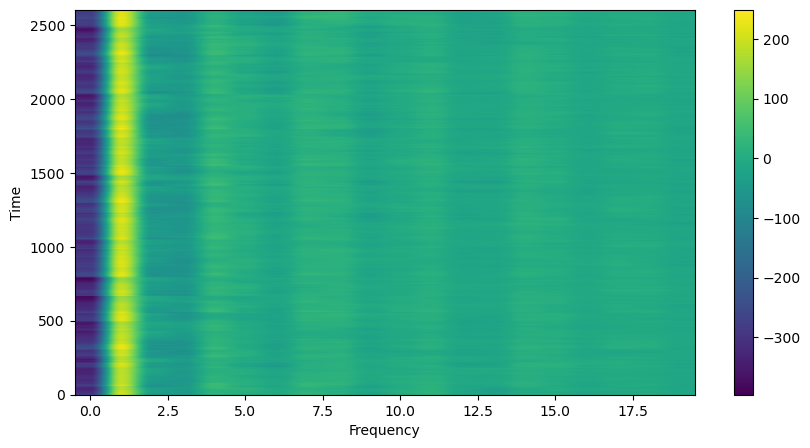

In [10]:
data = inputs[1000]
plt.figure(figsize=(10, 5))
plt.imshow(data, origin='lower', aspect='auto')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar()
plt.show()

In [11]:
import pandas as pd
df = pd.DataFrame(labels, columns=['label'])

In [12]:
counts = []
for i in range(10):
    count = len(df[df['label'] == i])
    counts.append(count)

In [13]:
counts

[500, 500, 499, 500, 500, 498, 499, 498, 497, 500]